# Import and Load

In [91]:
import pandas as pd
import os,glob
import holidays
import datetime as dt
from holidays import country_holidays
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import statsmodels.tsa.api as tsa

In [4]:
# get list of files from folder
OUTPUT_FOLDER = 'Data/Chicago/'
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836
3,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896
4,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
...,...,...,...,...,...,...,...,...,...,...,...,...
100405,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.0,33.0,41.953925,-87.707307
100406,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.0,9.0,41.677237,-87.623871
100407,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.0,36.0,41.938194,-87.793558
100408,13090346,05/30/2023 12:55:00 PM,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1913,19.0,46.0,41.963071,-87.655984


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812458 entries, 0 to 100409
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 670.5+ MB


In [6]:
keep_cols = ['Date','Primary Type','District']

In [7]:
df = df[keep_cols]
df.head()

,Date,Primary Type,District
0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,6.0
1,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,10.0
2,01/01/2001 01:00:00 AM,THEFT,3.0
3,01/01/2001 01:00:00 PM,THEFT,8.0
4,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,8.0


In [12]:
df.isna().sum()

Date             0
Primary Type     0
District        47
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Date            0
Primary Type    0
District        0
dtype: int64

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812411 entries, 0 to 100409
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Primary Type  object        
 2   District      int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 208.6+ MB


C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\2345423161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [70]:
ts = df.set_index('Date')
ts.head()

,Primary Type,District
Date,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,6
2001-01-01 01:00:00,CRIMINAL DAMAGE,10
2001-01-01 01:00:00,THEFT,3
2001-01-01 13:00:00,THEFT,8
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,8


In [56]:
ts['Primary Type'].nunique()

36

# 1) Comparing Police Districts
Which district has the most crimes? Which has the least?

In [18]:
df['District'] = df['District'].astype('int')

C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\1241654563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District'] = df['District'].astype('int')


In [21]:
df['District'].value_counts()

8     524945
11    501255
6     456881
7     451604
25    444467
4     443514
3     396210
12    387286
9     381633
2     369886
19    350749
18    350645
5     346173
10    336583
15    334708
1     316057
14    302237
16    261552
22    256059
24    236030
17    225505
20    138186
31       242
21         4
Name: District, dtype: int64

District 8 has the most crimes and District 21 has the least

# 2) Crimes Across the Years
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [33]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
year_plot = years.value_counts().sort_index()
year_plot

2001    485882
2002    486804
2003    475981
2004    469419
2005    453770
2006    448174
2007    437082
2008    427127
2009    392823
2010    370499
2011    351968
2012    336265
2013    307471
2014    275738
2015    264764
2016    269799
2017    269081
2018    268790
2019    261269
2020    212132
2021    208633
2022    238530
2023    100410
Name: Date, dtype: int64

In [39]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

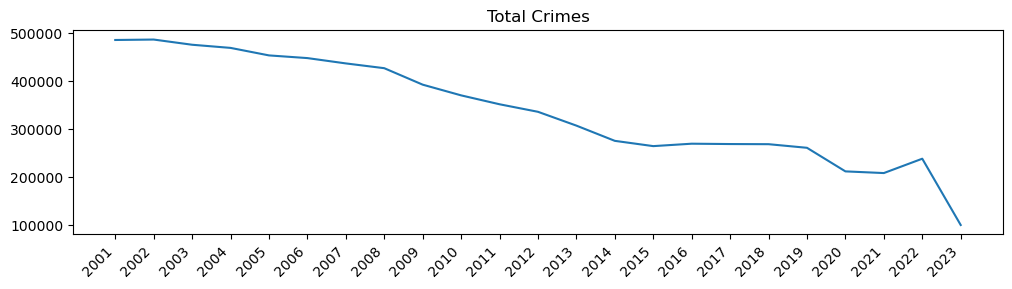

In [48]:
fig, ax = plt.subplots()
ax.plot(year_plot.index,year_plot.values)
ax.set_title('Total Crimes')
fig.autofmt_xdate(rotation=45)

The total number of crimes is decreasing across the years

In [72]:
ts = ts.drop('District',axis=1)

In [74]:
ts['Count'] = 1
ts

,Primary Type,Count
Date,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 01:00:00,THEFT,1
2001-01-01 13:00:00,THEFT,1
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,1
...,...,...
2023-05-30 12:48:00,THEFT,1
2023-05-30 12:50:00,CRIMINAL DAMAGE,1
2023-05-30 00:52:00,CRIMINAL DAMAGE,1


In [76]:
ts_rs = ts.groupby('Primary Type').resample('A').sum()
ts_rs

C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3536566492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_rs = ts.groupby('Primary Type').resample('A').sum()
C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3536566492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_rs = ts.groupby('Primary Type').resample('A').sum()
C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3536566492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3536566492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_rs = ts.groupby('Primary Type').resample('A').sum()
C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\3536566492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_rs = ts.groupby('Primary Type').resample('A').sum()


Count
Primary Type      Date             
ARSON             2001-12-31   1011
                  2002-12-31   1032
                  2003-12-31    955
                  2004-12-31    778
                  2005-12-31    691
...                             ...
WEAPONS VIOLATION 2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8766
                  2023-12-31   3487

[754 rows x 1 columns]

In [77]:
unstacked = ts_rs.unstack(level=0)
unstacked

Count                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Date                                              
2001-12-31    1011.0  31384.0  93460.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88379.0  25157.0   
2004-12-31     778.0  28850.0  87136.0  24563.0   
2005-12-31     691.0  27067.0  83964.0  25503.0   
2006-12-31     726.0  25945.0  80665.0  24324.0   
2007-12-31     712.0  26313.0  79593.0  24858.0   
2008-12-31     644.0  25445.0  75922.0  26216.0   
2009-12-31     616.0  22861.0  68460.0  26767.0   
2010-12-31     522.0  21537.0  65402.0  26422.0   
2011-12-31     504.0  20411.0  60459.0  26620.0   
2012-12-31     469.0  19899.0  59134.0  22845.0   
2013-12-31     364.0  17972.0  54006.0  17895.0   
2014-12-31     397.0  16903.0  49452.0  14569.0   
2015-12-31     453.0  17048.0  48923.0  13184.0   
2016-12-31     516.0  18742.0  50299.0  14289.0   
2017-12-31     444.0  19306.0  49238.0  13001.0   
2018-12-31     373.0  20406.0  49828.0  11746.0   
2019-12-31     376.0  20620.0  49518.0   9639.0   
2020-12-31     588.0  18254.0  41512.0   8757.0   
2021-12-31     529.0  20342.0  40458.0   6658.0   
2022-12-31     422.0  20787.0  40890.0   7592.0   
2023-12-31     191.0   8673.0  17024.0   2941.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                                 1.0              1779.0   
2002-12-31                                 0.0              1807.0   
2003-12-31                                 0.0              1571.0   
2004-12-31                                 0.0              1539.0   
2005-12-31                                 0.0              1522.0   
2006-12-31                                 0.0              1440.0   
2007-12-31                                 0.0              1508.0   
2008-12-31                                 0.0              1516.0   
2009-12-31                                 0.0              1404.0   
2010-12-31                                 0.0              1338.0   
2011-12-31                                 0.0              1461.0   
2012-12-31                                 0.0              1397.0   
2013-12-31                                 0.0              1273.0   
2014-12-31                                15.0              1314.0   
2015-12-31                                34.0              1352.0   
2016-12-31                                36.0              1500.0   
2017-12-31                                69.0              1511.0   
2018-12-31                               149.0              1400.0   
2019-12-31                               217.0               909.0   
2020-12-31                               148.0                75.0   
2021-12-31                               173.0                 NaN   
2022-12-31                               177.0                 NaN   
2023-12-31                                72.0                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31           55858.0                    30.0           13241.0   
2002-12-31           55941.0                    27.0           13880.0   
2003-12-31           55011.0                    40.0           14807.0   
2004-12-31           53164.0                    40.0           15913.0   
2005-12-31           54548.0                    36.0           16655.0   
2006-12-31           57124.0                    46.0           14505.0   
2007-12-31           53749.0                    52.0           13699.0   
2008-12-31           52838.0                    39.0           12310.0   
2009-12-31           47725.0                    39.0 

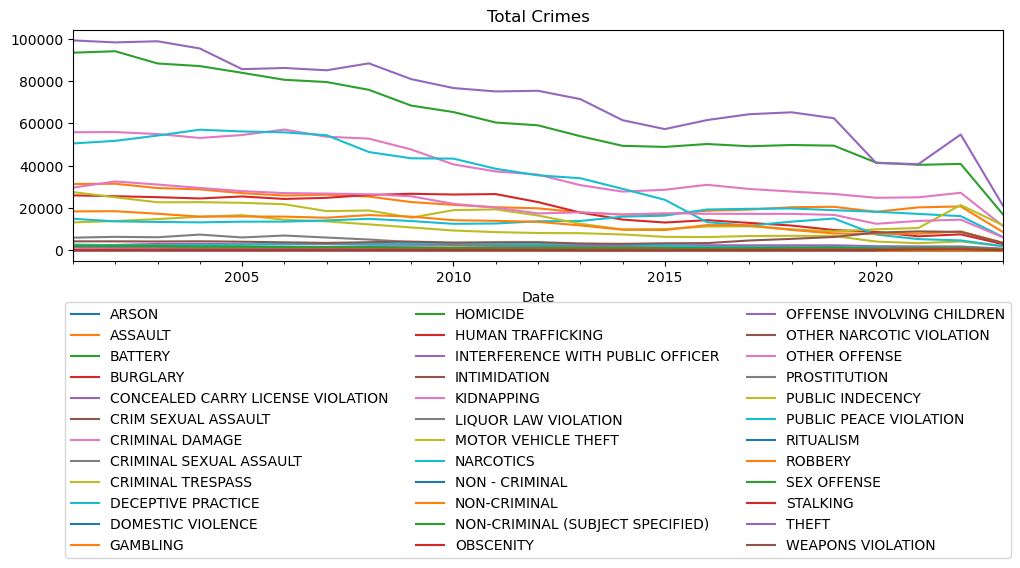

In [84]:
ax = unstacked['Count'].plot()
ax.set(title='Total Crimes', ylabel='')
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3);

In [89]:
unstacked_pct = unstacked.pct_change()*100

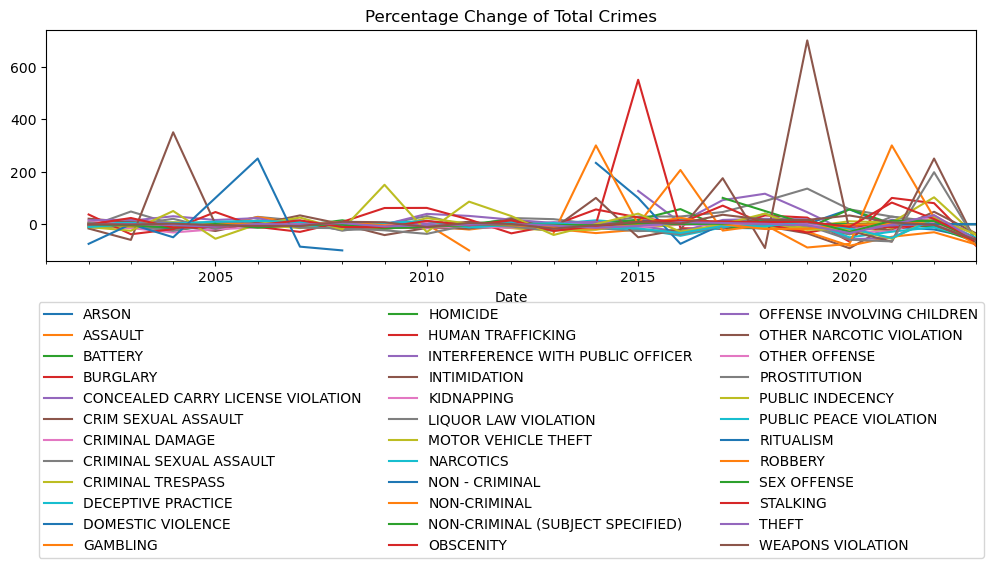

In [99]:
ax = unstacked_pct['Count'].plot()
ax.set(title='Percentage Change of Total Crimes', ylabel='')
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3);

There are not any individual crimes that are doing the opposite of overall crime. They all seem to be decreasing over time

# 4) Comparing Months

In [104]:
df['month'] = df['Date'].dt.month_name()

C:\Users\mmenj\AppData\Local\Temp\ipykernel_43244\459080519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month_name()


In [105]:
df.head()

,Date,Primary Type,District,day of week,month
0,2001-01-01 01:00:00,CRIMINAL DAMAGE,6,Monday,January
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,10,Monday,January
2,2001-01-01 01:00:00,THEFT,3,Monday,January
3,2001-01-01 13:00:00,THEFT,8,Monday,January
4,2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,8,Monday,January


In [108]:
df['month'].value_counts()

July         717152
August       710345
May          703413
June         681677
October      676158
September    668156
March        650051
April        647393
January      621987
November     608872
December     579657
February     547550
Name: month, dtype: int64

July has the most crime and February has the least

In [110]:
pd.set_option('display.max_rows', None)

In [114]:
month_counts = df.groupby('Primary Type')['month'].value_counts()
month_counts

Primary Type                       month    
ARSON                              July           1350
                                   May            1277
                                   June           1236
                                   August         1182
                                   March          1140
                                   April          1134
                                   September      1131
                                   October        1118
                                   November       1019
                                   January         963
                                   December        923
                                   February        840
ASSAULT                            May           50381
                                   July          47900
                                   June          47253
                                   August        46455
                                   September     45424
                    

In [116]:
top_month_counts = month_counts.groupby(level=0).head(1)
top_month_counts

Primary Type                       month    
ARSON                              July           1350
ASSAULT                            May           50381
BATTERY                            May          139487
BURGLARY                           August        40594
CONCEALED CARRY LICENSE VIOLATION  September       118
CRIM SEXUAL ASSAULT                July           2678
CRIMINAL DAMAGE                    July          83394
CRIMINAL SEXUAL ASSAULT            May             669
CRIMINAL TRESPASS                  March         19174
DECEPTIVE PRACTICE                 January       31593
DOMESTIC VIOLENCE                  January           1
GAMBLING                           August         2219
HOMICIDE                           July           1387
HUMAN TRAFFICKING                  January          15
INTERFERENCE WITH PUBLIC OFFICER   August         1819
INTIMIDATION                       October         443
KIDNAPPING                         May             706
LIQUOR LAW VIOLATION

In [137]:
not_july = top_month_counts[~top_month_counts.index.get_level_values(1).str.contains('July')]
not_july

Primary Type                       month    
ASSAULT                            May           50381
BATTERY                            May          139487
BURGLARY                           August        40594
CONCEALED CARRY LICENSE VIOLATION  September       118
CRIMINAL SEXUAL ASSAULT            May             669
CRIMINAL TRESPASS                  March         19174
DECEPTIVE PRACTICE                 January       31593
DOMESTIC VIOLENCE                  January           1
GAMBLING                           August         2219
HUMAN TRAFFICKING                  January          15
INTERFERENCE WITH PUBLIC OFFICER   August         1819
INTIMIDATION                       October         443
KIDNAPPING                         May             706
LIQUOR LAW VIOLATION               June           1476
MOTOR VEHICLE THEFT                October       33761
NARCOTICS                          March         69523
NON - CRIMINAL                     June              9
NON-CRIMINAL        

The above crimes do not follow this pattern